In [1]:
"""Setup for Fused_ZS6D"""
stride = 14
image_size_sd = 960
image_size_dino = 840
layer = 11
facet = 'token'
model_type = 'dinov2_vitb14'

In [2]:
from external.sd_dino.extractor_sd import load_model

# Instantiating the stable diffusion model:
model_sd, aug_sd = load_model(diffusion_ver="v1-5", image_size=image_size_sd, num_timesteps=100)


LatentDiffusion: Running in eps-prediction mode
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 1280, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 1280, con

/home/kilian/miniconda3/envs/zs6d_sd_dino/lib/python3.9/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
The checkpoint state_dict contains keys that are not used by the model:
  model_ema.{decay, num_updates}
backbone.feature_extractor.,category_head.clip.clip.,clip_head.clip.clip.
backbone.feature_projections.2.0.conv1.weight
backbone.feature_projections.2.0.shortcut.weight
backbone.feature_projections.3.0.conv1.weight
backbone.feature_projections.3.0.shortcut.weight
backbone.feature_projections.4.0.conv1.weight
backbone.feature_projections.4.0.shortcut.weight
backbone.feature_projections.5.0.conv1.weight
backbone.feature_projections.5.0.shortcut.weight


In [3]:
from zs6dsddino import ZS6DSdDino
import os
import json

# Loading the config file:
with open(os.path.join("./zs6d_configs/bop_eval_configs/cfg_ycbv_inference_bop_sd_dino.json"), "r") as f:
    config = json.load(f)

# Instantiating the pose estimator:
# This involves handing over the path to the templates_gt file and the corresponding object norm_factors.
pose_estimator_sd_dino = ZS6DSdDino(model_sd, aug_sd, image_size_dino, image_size_sd, layer, facet,
                                    config['templates_gt_path'], config['norm_factor_path'], model_type=model_type,
                                    stride=stride)


Using cache found in /home/kilian/.cache/torch/hub/facebookresearch_dinov2_main
/home/kilian/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/swiglu_ffn.py:43: UserWarning: xFormers is available (SwiGLU)
  warnings.warn("xFormers is available (SwiGLU)")
/home/kilian/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/attention.py:27: UserWarning: xFormers is available (Attention)
  warnings.warn("xFormers is available (Attention)")
/home/kilian/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/block.py:40: UserWarning: xFormers is not available (Block)
  warnings.warn("xFormers is not available (Block)")
100%|██████████| 21/21 [01:16<00:00,  3.65s/it]


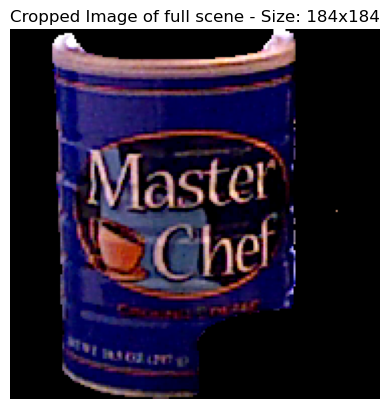

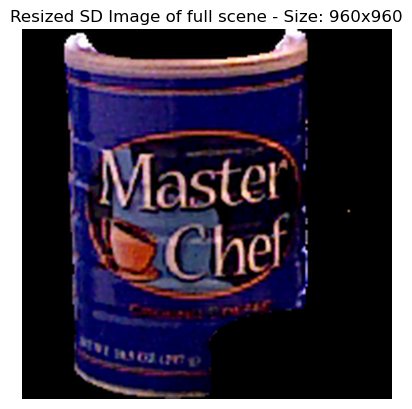

Shape of SD features: torch.Size([1, 1, 3600, 384])
Shape of DINO features: torch.Size([1, 1, 3600, 768])
Shape of SD-DINO features: torch.Size([1, 1, 3600, 1152])


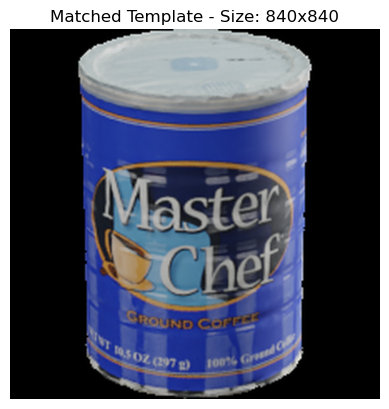

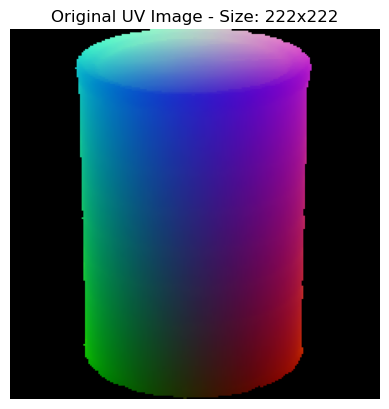

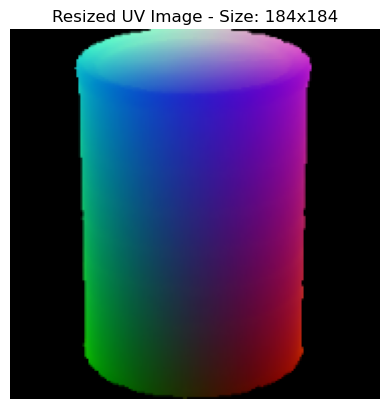

resize_factor = 1.0
0.21904761904761905
points1:
[(16, 50), (145, 56), (142, 38), (179, 47), (4, 23), (87, 29), (151, 19), (139, 47), (59, 50), (139, 19), (38, 13), (44, 13), (38, 13), (41, 13), (26, 13), (26, 13), (47, 13), (47, 13), (44, 13), (26, 13)]
points2:
[(16, 50), (145, 56), (142, 38), (179, 47), (4, 23), (87, 29), (151, 19), (139, 47), (59, 50), (139, 19), (19, 13), (44, 13), (26, 13), (41, 13), (47, 13), (38, 13), (4, 13), (35, 13), (167, 10), (29, 13)]
After scale_factor
[(16, 50), (145, 56), (142, 38), (179, 47), (4, 23), (87, 29), (151, 19), (139, 47), (59, 50), (139, 19), (38, 13), (44, 13), (38, 13), (41, 13), (26, 13), (26, 13), (47, 13), (47, 13), (44, 13), (26, 13)] [(16, 50), (145, 56), (142, 38), (179, 47), (4, 23), (87, 29), (151, 19), (139, 47), (59, 50), (139, 19), (19, 13), (44, 13), (26, 13), (41, 13), (47, 13), (38, 13), (4, 13), (35, 13), (167, 10), (29, 13)]
valid points 1:
[(16, 50), (145, 56), (142, 38), (139, 47), (59, 50)]
valid points 1 after transfor

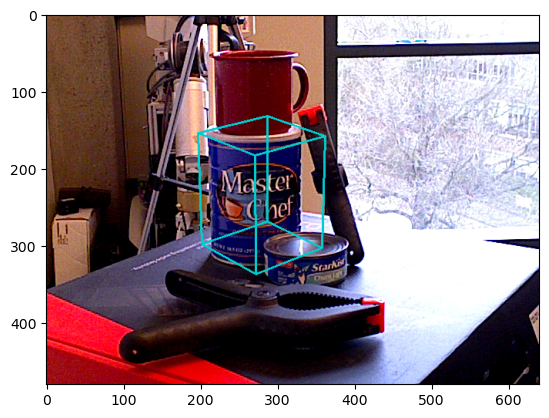

Pose estimation time: 7.259630918502808
R_est: [[ 0.75258115 -0.65845244  0.00787405]
 [-0.24574042 -0.29192367 -0.92433339]
 [ 0.6109282   0.69370091 -0.38150462]]
t_est: [-29.58415288  -9.37656859 961.44754249]


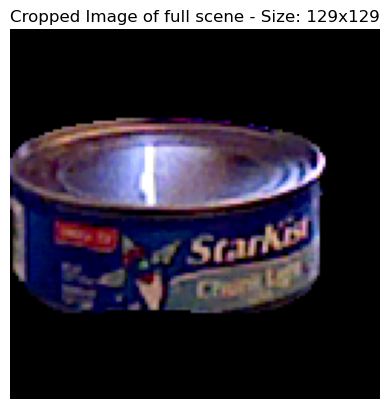

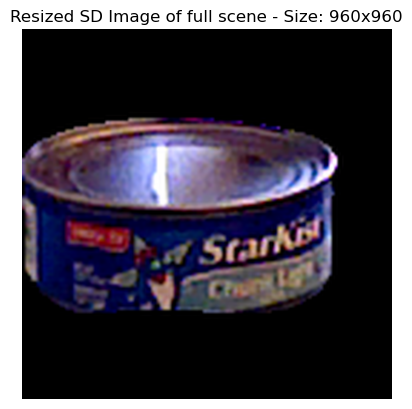

Shape of SD features: torch.Size([1, 1, 3600, 384])
Shape of DINO features: torch.Size([1, 1, 3600, 768])
Shape of SD-DINO features: torch.Size([1, 1, 3600, 1152])


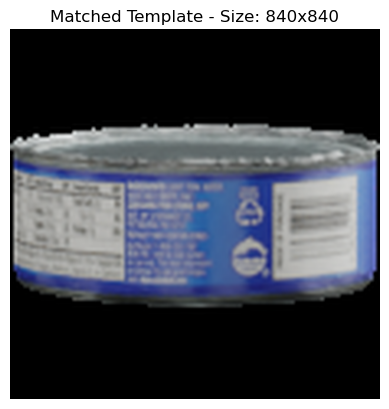

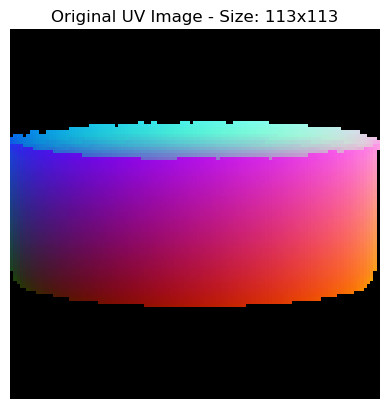

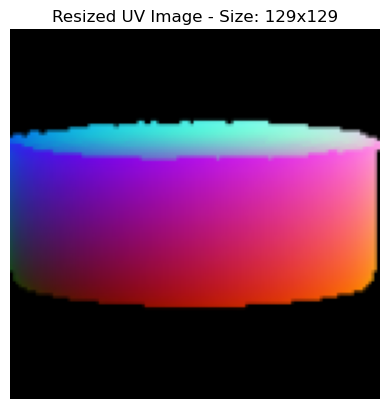

resize_factor = 1.0
0.15357142857142858
points1:
[(11, 35), (3, 16), (99, 26), (125, 33), (97, 13), (102, 39), (97, 33), (61, 20), (106, 13), (87, 16), (31, 9), (41, 35), (33, 9), (3, 9), (31, 9), (16, 9), (26, 9), (112, 35), (72, 20), (3, 9)]
points2:
[(11, 35), (3, 16), (99, 26), (125, 33), (97, 13), (102, 39), (97, 33), (61, 20), (106, 13), (87, 16), (29, 9), (41, 35), (31, 9), (24, 9), (5, 9), (26, 9), (33, 9), (112, 35), (72, 20), (7, 9)]
After scale_factor
[(11, 35), (3, 16), (99, 26), (125, 33), (97, 13), (102, 39), (97, 33), (61, 20), (106, 13), (87, 16), (31, 9), (41, 35), (33, 9), (3, 9), (31, 9), (16, 9), (26, 9), (112, 35), (72, 20), (3, 9)] [(11, 35), (3, 16), (99, 26), (125, 33), (97, 13), (102, 39), (97, 33), (61, 20), (106, 13), (87, 16), (29, 9), (41, 35), (31, 9), (24, 9), (5, 9), (26, 9), (33, 9), (112, 35), (72, 20), (7, 9)]
valid points 1:
[(61, 20), (87, 16), (41, 35), (72, 20)]
valid points 1 after transformation
[[61. 20.]
 [87. 16.]
 [41. 35.]
 [72. 20.]]


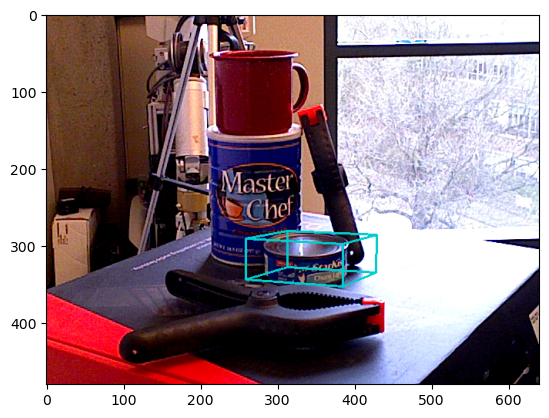

Pose estimation time: 5.29453182220459
R_est: [[ 0.91487267  0.40366157  0.00808337]
 [ 0.0284068  -0.04438488 -0.99861055]
 [-0.40274192  0.91383112 -0.05207324]]
t_est: [ 22.13608145  48.23678428 701.96746042]


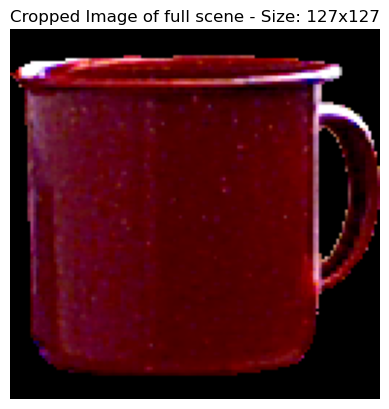

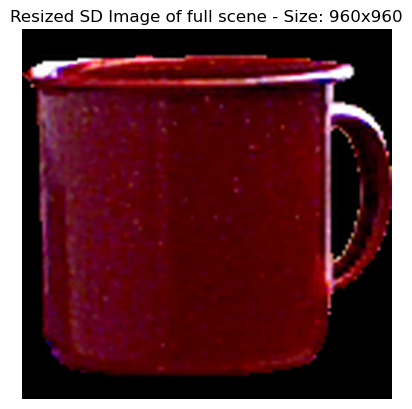

Shape of SD features: torch.Size([1, 1, 3600, 384])
Shape of DINO features: torch.Size([1, 1, 3600, 768])
Shape of SD-DINO features: torch.Size([1, 1, 3600, 1152])


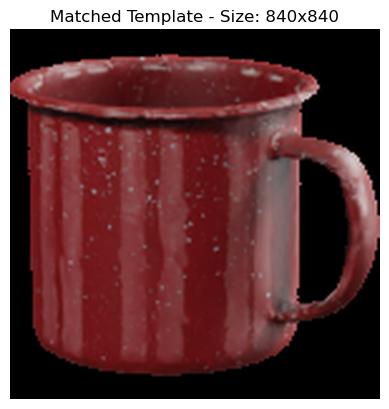

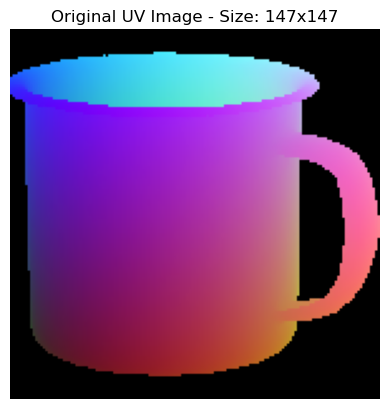

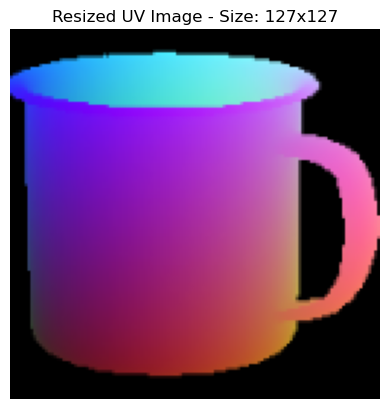

resize_factor = 1.0
0.15119047619047618
points1:
[(11, 34), (98, 26), (123, 32), (100, 39), (96, 32), (3, 15), (60, 20), (96, 13), (104, 13), (41, 34), (43, 15), (96, 24), (28, 9), (3, 9), (30, 9), (81, 17), (32, 9), (32, 9), (32, 9), (24, 9)]
points2:
[(11, 34), (98, 26), (123, 32), (100, 39), (96, 32), (3, 15), (60, 20), (96, 13), (104, 13), (41, 34), (43, 15), (96, 24), (5, 9), (11, 9), (26, 9), (81, 17), (30, 9), (28, 9), (24, 9), (17, 9)]
After scale_factor
[(11, 34), (98, 26), (123, 32), (100, 39), (96, 32), (3, 15), (60, 20), (96, 13), (104, 13), (41, 34), (43, 15), (96, 24), (28, 9), (3, 9), (30, 9), (81, 17), (32, 9), (32, 9), (32, 9), (24, 9)] [(11, 34), (98, 26), (123, 32), (100, 39), (96, 32), (3, 15), (60, 20), (96, 13), (104, 13), (41, 34), (43, 15), (96, 24), (5, 9), (11, 9), (26, 9), (81, 17), (30, 9), (28, 9), (24, 9), (17, 9)]
valid points 1:
[(11, 34), (98, 26), (100, 39), (96, 32), (60, 20), (96, 13), (104, 13), (41, 34), (43, 15), (96, 24), (30, 9), (81, 17), (32, 

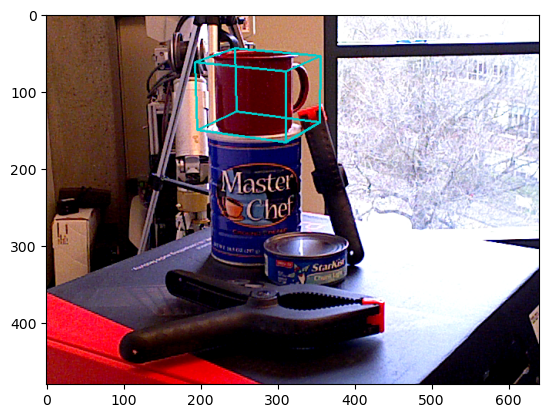

Pose estimation time: 5.403299331665039
R_est: [[ 0.89530506  0.44544238 -0.00315212]
 [ 0.15679182 -0.32174714 -0.93375323]
 [-0.41694745  0.83549977 -0.35790357]]
t_est: [ -33.15078178 -126.76920844  975.53175755]


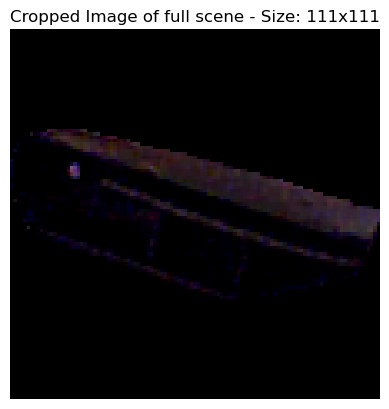

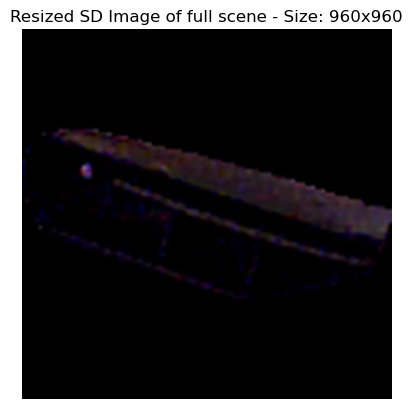

Shape of SD features: torch.Size([1, 1, 3600, 384])
Shape of DINO features: torch.Size([1, 1, 3600, 768])
Shape of SD-DINO features: torch.Size([1, 1, 3600, 1152])


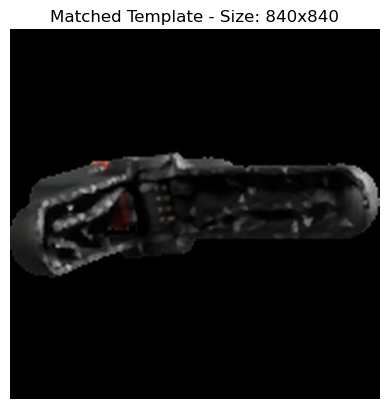

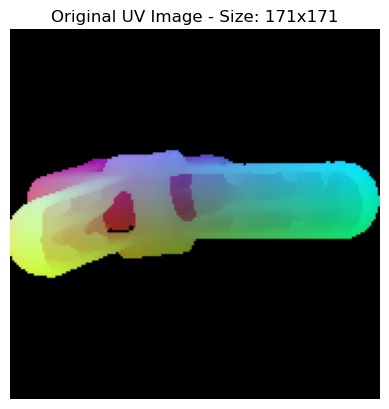

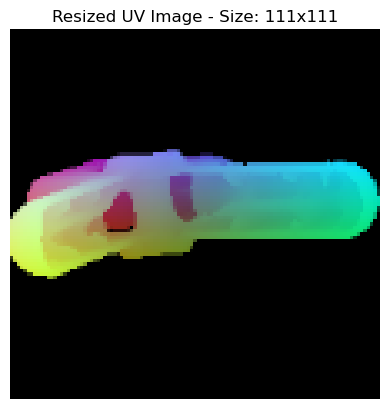

resize_factor = 1.0
0.13214285714285715
points1:
[(10, 30), (87, 34), (86, 23), (108, 28), (2, 13), (84, 21), (84, 28), (91, 12), (74, 13), (45, 28), (61, 17), (52, 17), (28, 28), (61, 15), (32, 34), (36, 30), (71, 15), (12, 8), (54, 12), (97, 30)]
points2:
[(10, 30), (87, 34), (86, 23), (108, 28), (2, 13), (84, 21), (84, 28), (91, 12), (74, 13), (12, 32), (61, 17), (52, 17), (28, 28), (61, 15), (32, 34), (36, 30), (71, 15), (28, 8), (54, 12), (97, 30)]
After scale_factor
[(10, 30), (87, 34), (86, 23), (108, 28), (2, 13), (84, 21), (84, 28), (91, 12), (74, 13), (45, 28), (61, 17), (52, 17), (28, 28), (61, 15), (32, 34), (36, 30), (71, 15), (12, 8), (54, 12), (97, 30)] [(10, 30), (87, 34), (86, 23), (108, 28), (2, 13), (84, 21), (84, 28), (91, 12), (74, 13), (12, 32), (61, 17), (52, 17), (28, 28), (61, 15), (32, 34), (36, 30), (71, 15), (28, 8), (54, 12), (97, 30)]
valid points 1:
[(74, 13), (61, 17), (52, 17), (61, 15), (71, 15), (54, 12)]
valid points 1 after transformation
[[74. 13.]

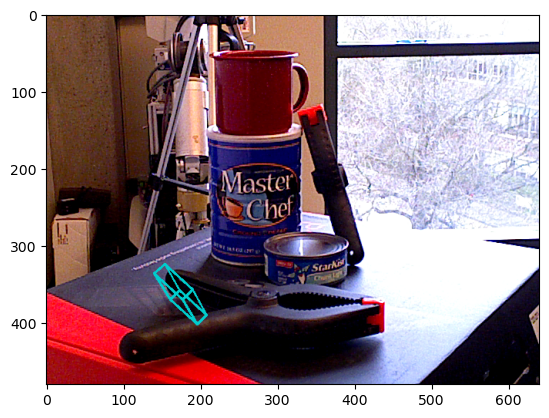

Pose estimation time: 5.468980550765991
R_est: [[ 0.70667415 -0.13540397 -0.69446196]
 [ 0.54810359 -0.51592366  0.6583352 ]
 [-0.44743055 -0.84586556 -0.29037451]]
t_est: [  298.08187767  -266.19299662 -2311.6527175 ]


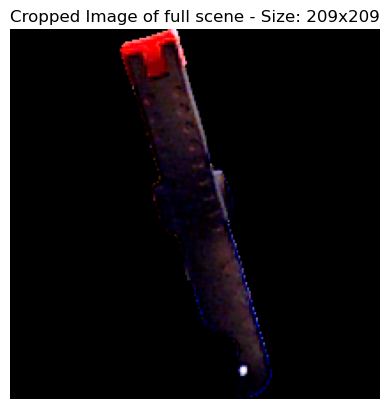

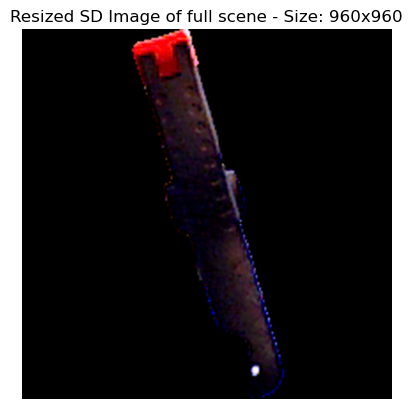

Shape of SD features: torch.Size([1, 1, 3600, 384])
Shape of DINO features: torch.Size([1, 1, 3600, 768])
Shape of SD-DINO features: torch.Size([1, 1, 3600, 1152])


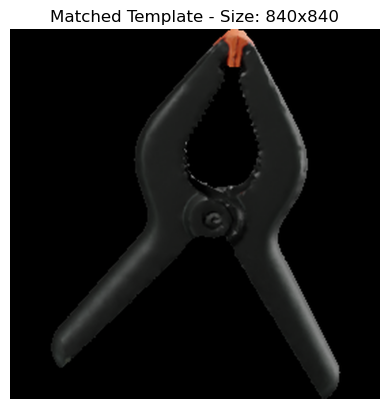

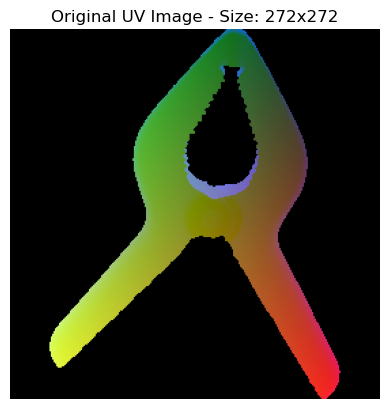

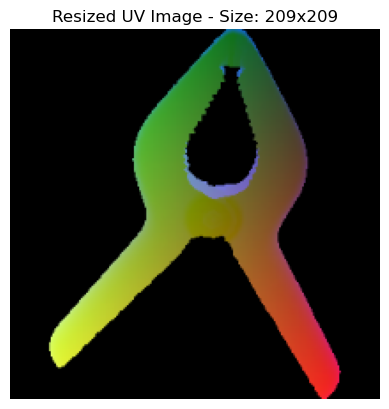

resize_factor = 1.0
0.2488095238095238
points1:
[(19, 57), (165, 64), (5, 26), (172, 22), (161, 43), (158, 40), (203, 53), (60, 43), (158, 40), (99, 33), (158, 53), (22, 60), (158, 22), (116, 29), (53, 53), (141, 26), (141, 26), (22, 60), (29, 36), (141, 26)]
points2:
[(19, 57), (165, 64), (5, 26), (172, 22), (161, 43), (158, 40), (203, 53), (60, 43), (116, 33), (99, 33), (158, 53), (22, 60), (158, 22), (116, 29), (53, 53), (47, 15), (29, 15), (102, 22), (29, 36), (53, 15)]
After scale_factor
[(19, 57), (165, 64), (5, 26), (172, 22), (161, 43), (158, 40), (203, 53), (60, 43), (158, 40), (99, 33), (158, 53), (22, 60), (158, 22), (116, 29), (53, 53), (141, 26), (141, 26), (22, 60), (29, 36), (141, 26)] [(19, 57), (165, 64), (5, 26), (172, 22), (161, 43), (158, 40), (203, 53), (60, 43), (116, 33), (99, 33), (158, 53), (22, 60), (158, 22), (116, 29), (53, 53), (47, 15), (29, 15), (102, 22), (29, 36), (53, 15)]
valid points 1:
[(161, 43), (158, 40), (158, 53)]


AttributeError: 'NoneType' object has no attribute 'dot'

In [4]:
import cv2
from PIL import Image
import pose_utils.img_utils as img_utils
import pose_utils.vis_utils as vis_utils
import numpy as np
import time
import matplotlib.pyplot as plt
import torch


# Loading a ground truth file to access segmentation masks to test zs6d:
with open(os.path.join(config['gt_path']), 'r') as f:
    data_gt = json.load(f)

img_id = '000048_1' # for ycbv
#img_id = '36' # for lmo

device = 'cuda' if torch.cuda.is_available() else 'cpu'

patch_size = 14 #extractor.model.patch_embed.patch_size[0]
num_patches = int(patch_size / stride * (image_size_dino // patch_size))



for i in range(len(data_gt[img_id])):
    obj_number = i
    obj_id = data_gt[img_id][obj_number]['obj_id']
    cam_K = np.array(data_gt[img_id][obj_number]['cam_K']).reshape((3,3))
    bbox = data_gt[img_id][obj_number]['bbox_visib']

    img_path = "./test/000002.png"
    img = Image.open(img_path)

    mask = data_gt[img_id][obj_number]['mask_sam']
    mask = img_utils.rle_to_mask(mask)
    mask = mask.astype(np.uint8)

    start_time = time.time()
    
    # To estimate the objects Rotation R and translation t the input image, the object_id, a segmentation mask and camera matrix are necessary
    R_est, t_est = pose_estimator_sd_dino.get_pose(num_patches, img, str(obj_id), mask, cam_K, bbox=None)

    end_time = time.time()
    
    out_img = vis_utils.draw_3D_bbox_on_image(np.array(img), R_est, t_est, cam_K, data_gt[img_id][obj_number]['model_info'], factor=1.0)

    plt.imshow(out_img)
    plt.show()
    print(f"Pose estimation time: {end_time-start_time}")
    print(f"R_est: {R_est}")
    print(f"t_est: {t_est}")
